### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import datetime

%matplotlib inline
sns.set_style('dark')
sns.set(font_scale=1.2)

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',None)
pd.set_option('display.width', 1000)

np.random.seed(0)
np.set_printoptions(suppress=True)

In [2]:
df = pd.read_csv("QVI_data.csv",parse_dates=['DATE'])

In [3]:
df

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget
3,1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream
...,...,...,...,...,...,...,...,...,...,...,...,...
264829,2370701,2018-12-08,88,240378,24,Grain Waves Sweet Chilli 210g,2,7.2,210,GRNWVES,YOUNG FAMILIES,Mainstream
264830,2370751,2018-10-01,88,240394,60,Kettle Tortilla ChpsFeta&Garlic 150g,2,9.2,150,KETTLE,YOUNG FAMILIES,Premium
264831,2370961,2018-10-24,88,240480,70,Tyrrells Crisps Lightly Salted 165g,2,8.4,165,TYRRELLS,OLDER FAMILIES,Budget
264832,2370961,2018-10-27,88,240481,65,Old El Paso Salsa Dip Chnky Tom Ht300g,2,10.2,300,OLD,OLDER FAMILIES,Budget


In [4]:
df.sort_values(by="DATE")

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
101808,104039,2018-07-01,104,103937,53,RRD Sweet Chilli & Sour Cream 165g,2,6.0,165,RRD,OLDER SINGLES/COUPLES,Premium
118872,118107,2018-07-01,118,121300,33,Cobs Popd Swt/Chlli &Sr/Cream Chips 110g,2,7.6,110,COBS,RETIREES,Mainstream
221754,226024,2018-07-01,226,226348,114,Kettle Sensations Siracha Lime 150g,2,9.2,150,KETTLE,YOUNG FAMILIES,Premium
147394,152040,2018-07-01,152,150459,25,Pringles SourCream Onion 134g,2,7.4,134,PRINGLES,YOUNG FAMILIES,Mainstream
29702,33140,2018-07-01,33,30342,10,RRD SR Slow Rst Pork Belly 150g,2,5.4,150,RRD,YOUNG FAMILIES,Mainstream
...,...,...,...,...,...,...,...,...,...,...,...,...
87112,90228,2019-06-30,90,88954,77,Doritos Corn Chips Nacho Cheese 170g,2,8.8,170,DORITOS,YOUNG SINGLES/COUPLES,Premium
194066,199122,2019-06-30,199,198088,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,150,DORITOS,NEW FAMILIES,Premium
194046,199117,2019-06-30,199,198068,77,Doritos Corn Chips Nacho Cheese 170g,2,8.8,170,DORITOS,MIDAGE SINGLES/COUPLES,Mainstream
242433,245056,2019-06-30,245,247444,75,Cobs Popd Sea Salt Chips 110g,2,7.6,110,COBS,YOUNG SINGLES/COUPLES,Mainstream


### Exploratory Data Analysis

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264834 entries, 0 to 264833
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   LYLTY_CARD_NBR    264834 non-null  int64         
 1   DATE              264834 non-null  datetime64[ns]
 2   STORE_NBR         264834 non-null  int64         
 3   TXN_ID            264834 non-null  int64         
 4   PROD_NBR          264834 non-null  int64         
 5   PROD_NAME         264834 non-null  object        
 6   PROD_QTY          264834 non-null  int64         
 7   TOT_SALES         264834 non-null  float64       
 8   PACK_SIZE         264834 non-null  int64         
 9   BRAND             264834 non-null  object        
 10  LIFESTAGE         264834 non-null  object        
 11  PREMIUM_CUSTOMER  264834 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(6), object(4)
memory usage: 24.2+ MB


In [6]:
df.describe()

,LYLTY_CARD_NBR,STORE_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,PACK_SIZE
count,2.648340e+05,264834.000000,2.648340e+05,264834.000000,264834.000000,264834.000000,264834.000000
mean,1.355488e+05,135.079423,1.351576e+05,56.583554,1.905813,7.299346,182.425512
std,8.057990e+04,76.784063,7.813292e+04,32.826444,0.343436,2.527241,64.325148
min,1.000000e+03,1.000000,1.000000e+00,1.000000,1.000000,1.500000,70.000000
25%,7.002100e+04,70.000000,6.760050e+04,28.000000,2.000000,5.400000,150.000000
50%,1.303570e+05,130.000000,1.351365e+05,56.000000,2.000000,7.400000,170.000000
75%,2.030940e+05,203.000000,2.026998e+05,85.000000,2.000000,9.200000,175.000000
max,2.373711e+06,272.000000,2.415841e+06,114.000000,5.000000,29.500000,380.000000


In [7]:
df.columns

Index(['LYLTY_CARD_NBR', 'DATE', 'STORE_NBR', 'TXN_ID', 'PROD_NBR', 'PROD_NAME', 'PROD_QTY', 'TOT_SALES', 'PACK_SIZE', 'BRAND', 'LIFESTAGE', 'PREMIUM_CUSTOMER'], dtype='object')

In [8]:
df["STORE_NBR"].value_counts()

226    2020
88     1873
93     1832
165    1819
237    1785
       ... 
11        2
31        2
206       2
76        1
92        1
Name: STORE_NBR, Length: 272, dtype: int64

## Store 77

In [9]:
store77 = df[df["STORE_NBR"] == 77]

In [10]:
store77

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
73365,77000,2019-03-28,77,74911,18,Cheetos Chs & Bacon Balls 190g,1,3.3,190,CHEETOS,MIDAGE SINGLES/COUPLES,Budget
73366,77000,2019-04-13,77,74912,69,Smiths Chip Thinly S/Cream&Onion 175g,1,3.0,175,SMITHS,MIDAGE SINGLES/COUPLES,Budget
73367,77000,2018-09-26,77,74910,36,Kettle Chilli 175g,2,10.8,175,KETTLE,MIDAGE SINGLES/COUPLES,Budget
73368,77001,2019-02-27,77,74913,7,Smiths Crinkle Original 330g,2,11.4,330,SMITHS,YOUNG FAMILIES,Mainstream
73369,77001,2019-01-21,77,74914,9,Kettle Tortilla ChpsBtroot&Ricotta 150g,2,9.2,150,KETTLE,YOUNG FAMILIES,Mainstream
...,...,...,...,...,...,...,...,...,...,...,...,...
264818,2330321,2018-07-30,77,236756,71,Twisties Cheese Burger 250g,2,8.6,250,TWISTIES,YOUNG SINGLES/COUPLES,Mainstream
264819,2330331,2018-11-18,77,236760,95,Sunbites Whlegrn Crisps Frch/Onin 90g,2,3.4,90,SUNBITES,RETIREES,Budget
264820,2330431,2018-07-31,77,236770,50,Tostitos Lightly Salted 175g,1,4.4,175,TOSTITOS,OLDER SINGLES/COUPLES,Mainstream
264821,2330461,2018-07-21,77,236777,87,Infuzions BBQ Rib Prawn Crackers 110g,1,3.8,110,INFUZIONS,OLDER FAMILIES,Budget


In [11]:
store77.reset_index(drop=True,inplace=True)

In [12]:
store77

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,77000,2019-03-28,77,74911,18,Cheetos Chs & Bacon Balls 190g,1,3.3,190,CHEETOS,MIDAGE SINGLES/COUPLES,Budget
1,77000,2019-04-13,77,74912,69,Smiths Chip Thinly S/Cream&Onion 175g,1,3.0,175,SMITHS,MIDAGE SINGLES/COUPLES,Budget
2,77000,2018-09-26,77,74910,36,Kettle Chilli 175g,2,10.8,175,KETTLE,MIDAGE SINGLES/COUPLES,Budget
3,77001,2019-02-27,77,74913,7,Smiths Crinkle Original 330g,2,11.4,330,SMITHS,YOUNG FAMILIES,Mainstream
4,77001,2019-01-21,77,74914,9,Kettle Tortilla ChpsBtroot&Ricotta 150g,2,9.2,150,KETTLE,YOUNG FAMILIES,Mainstream
...,...,...,...,...,...,...,...,...,...,...,...,...
558,2330321,2018-07-30,77,236756,71,Twisties Cheese Burger 250g,2,8.6,250,TWISTIES,YOUNG SINGLES/COUPLES,Mainstream
559,2330331,2018-11-18,77,236760,95,Sunbites Whlegrn Crisps Frch/Onin 90g,2,3.4,90,SUNBITES,RETIREES,Budget
560,2330431,2018-07-31,77,236770,50,Tostitos Lightly Salted 175g,1,4.4,175,TOSTITOS,OLDER SINGLES/COUPLES,Mainstream
561,2330461,2018-07-21,77,236777,87,Infuzions BBQ Rib Prawn Crackers 110g,1,3.8,110,INFUZIONS,OLDER FAMILIES,Budget


## Store 86

In [13]:
store86 = df[df["STORE_NBR"] == 86]

In [14]:
store86

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
82393,86000,2018-08-26,86,84137,90,Tostitos Smoked Chipotle 175g,2,8.8,175,TOSTITOS,YOUNG FAMILIES,Premium
82394,86000,2018-09-25,86,84138,88,Kettle Honey Soy Chicken 175g,2,10.8,175,KETTLE,YOUNG FAMILIES,Premium
82395,86000,2019-02-19,86,84139,41,Doritos Salsa Mild 300g,2,5.2,300,DORITOS,YOUNG FAMILIES,Premium
82396,86000,2018-11-20,86,84140,111,Smiths Chip Thinly Cut Original 175g,2,6.0,175,SMITHS,YOUNG FAMILIES,Premium
82397,86000,2018-11-30,86,84141,13,Red Rock Deli Thai Chilli&Lime 150g,2,5.4,150,RRD,YOUNG FAMILIES,Premium
...,...,...,...,...,...,...,...,...,...,...,...,...
153415,155479,2018-08-19,86,155508,74,Tostitos Splash Of Lime 175g,2,8.8,175,TOSTITOS,NEW FAMILIES,Mainstream
153416,155479,2018-11-21,86,155509,9,Kettle Tortilla ChpsBtroot&Ricotta 150g,2,9.2,150,KETTLE,NEW FAMILIES,Mainstream
153417,155485,2018-11-08,86,155552,97,RRD Salt & Vinegar 165g,2,6.0,165,RRD,OLDER SINGLES/COUPLES,Mainstream
153418,155489,2018-08-15,86,155582,78,Thins Chips Salt & Vinegar 175g,2,6.6,175,THINS,RETIREES,Premium


In [15]:
store86.reset_index(drop=True,inplace=True)

In [16]:
store86

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,86000,2018-08-26,86,84137,90,Tostitos Smoked Chipotle 175g,2,8.8,175,TOSTITOS,YOUNG FAMILIES,Premium
1,86000,2018-09-25,86,84138,88,Kettle Honey Soy Chicken 175g,2,10.8,175,KETTLE,YOUNG FAMILIES,Premium
2,86000,2019-02-19,86,84139,41,Doritos Salsa Mild 300g,2,5.2,300,DORITOS,YOUNG FAMILIES,Premium
3,86000,2018-11-20,86,84140,111,Smiths Chip Thinly Cut Original 175g,2,6.0,175,SMITHS,YOUNG FAMILIES,Premium
4,86000,2018-11-30,86,84141,13,Red Rock Deli Thai Chilli&Lime 150g,2,5.4,150,RRD,YOUNG FAMILIES,Premium
...,...,...,...,...,...,...,...,...,...,...,...,...
1533,155479,2018-08-19,86,155508,74,Tostitos Splash Of Lime 175g,2,8.8,175,TOSTITOS,NEW FAMILIES,Mainstream
1534,155479,2018-11-21,86,155509,9,Kettle Tortilla ChpsBtroot&Ricotta 150g,2,9.2,150,KETTLE,NEW FAMILIES,Mainstream
1535,155485,2018-11-08,86,155552,97,RRD Salt & Vinegar 165g,2,6.0,165,RRD,OLDER SINGLES/COUPLES,Mainstream
1536,155489,2018-08-15,86,155582,78,Thins Chips Salt & Vinegar 175g,2,6.6,175,THINS,RETIREES,Premium


## Store 88

In [17]:
store88 = df[df["STORE_NBR"] == 88]

In [18]:
store88

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
84429,88000,2018-09-12,88,86220,4,Dorito Corn Chp Supreme 380g,2,13.0,380,DORITOS,MIDAGE SINGLES/COUPLES,Budget
84430,88000,2018-10-26,88,86221,31,Infzns Crn Crnchers Tangy Gcamole 110g,2,7.6,110,INFUZIONS,MIDAGE SINGLES/COUPLES,Budget
84431,88000,2019-02-02,88,86222,46,Kettle Original 175g,2,10.8,175,KETTLE,MIDAGE SINGLES/COUPLES,Budget
84432,88000,2019-05-01,88,86223,47,Doritos Corn Chips Original 170g,2,8.8,170,DORITOS,MIDAGE SINGLES/COUPLES,Budget
84433,88000,2019-05-02,88,86224,102,Kettle Mozzarella Basil & Pesto 175g,2,10.8,175,KETTLE,MIDAGE SINGLES/COUPLES,Budget
...,...,...,...,...,...,...,...,...,...,...,...,...
264829,2370701,2018-12-08,88,240378,24,Grain Waves Sweet Chilli 210g,2,7.2,210,GRNWVES,YOUNG FAMILIES,Mainstream
264830,2370751,2018-10-01,88,240394,60,Kettle Tortilla ChpsFeta&Garlic 150g,2,9.2,150,KETTLE,YOUNG FAMILIES,Premium
264831,2370961,2018-10-24,88,240480,70,Tyrrells Crisps Lightly Salted 165g,2,8.4,165,TYRRELLS,OLDER FAMILIES,Budget
264832,2370961,2018-10-27,88,240481,65,Old El Paso Salsa Dip Chnky Tom Ht300g,2,10.2,300,OLD,OLDER FAMILIES,Budget


In [19]:
store88.reset_index(drop=True,inplace=True)

In [20]:
store88

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,88000,2018-09-12,88,86220,4,Dorito Corn Chp Supreme 380g,2,13.0,380,DORITOS,MIDAGE SINGLES/COUPLES,Budget
1,88000,2018-10-26,88,86221,31,Infzns Crn Crnchers Tangy Gcamole 110g,2,7.6,110,INFUZIONS,MIDAGE SINGLES/COUPLES,Budget
2,88000,2019-02-02,88,86222,46,Kettle Original 175g,2,10.8,175,KETTLE,MIDAGE SINGLES/COUPLES,Budget
3,88000,2019-05-01,88,86223,47,Doritos Corn Chips Original 170g,2,8.8,170,DORITOS,MIDAGE SINGLES/COUPLES,Budget
4,88000,2019-05-02,88,86224,102,Kettle Mozzarella Basil & Pesto 175g,2,10.8,175,KETTLE,MIDAGE SINGLES/COUPLES,Budget
...,...,...,...,...,...,...,...,...,...,...,...,...
1868,2370701,2018-12-08,88,240378,24,Grain Waves Sweet Chilli 210g,2,7.2,210,GRNWVES,YOUNG FAMILIES,Mainstream
1869,2370751,2018-10-01,88,240394,60,Kettle Tortilla ChpsFeta&Garlic 150g,2,9.2,150,KETTLE,YOUNG FAMILIES,Premium
1870,2370961,2018-10-24,88,240480,70,Tyrrells Crisps Lightly Salted 165g,2,8.4,165,TYRRELLS,OLDER FAMILIES,Budget
1871,2370961,2018-10-27,88,240481,65,Old El Paso Salsa Dip Chnky Tom Ht300g,2,10.2,300,OLD,OLDER FAMILIES,Budget


### Add month columns and pivot tables

In [21]:
store77.head()

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,77000,2019-03-28,77,74911,18,Cheetos Chs & Bacon Balls 190g,1,3.3,190,CHEETOS,MIDAGE SINGLES/COUPLES,Budget
1,77000,2019-04-13,77,74912,69,Smiths Chip Thinly S/Cream&Onion 175g,1,3.0,175,SMITHS,MIDAGE SINGLES/COUPLES,Budget
2,77000,2018-09-26,77,74910,36,Kettle Chilli 175g,2,10.8,175,KETTLE,MIDAGE SINGLES/COUPLES,Budget
3,77001,2019-02-27,77,74913,7,Smiths Crinkle Original 330g,2,11.4,330,SMITHS,YOUNG FAMILIES,Mainstream
4,77001,2019-01-21,77,74914,9,Kettle Tortilla ChpsBtroot&Ricotta 150g,2,9.2,150,KETTLE,YOUNG FAMILIES,Mainstream


In [22]:
store77["Month"] = store77["DATE"].dt.month

In [23]:
store77.head()

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER,Month
0,77000,2019-03-28,77,74911,18,Cheetos Chs & Bacon Balls 190g,1,3.3,190,CHEETOS,MIDAGE SINGLES/COUPLES,Budget,3
1,77000,2019-04-13,77,74912,69,Smiths Chip Thinly S/Cream&Onion 175g,1,3.0,175,SMITHS,MIDAGE SINGLES/COUPLES,Budget,4
2,77000,2018-09-26,77,74910,36,Kettle Chilli 175g,2,10.8,175,KETTLE,MIDAGE SINGLES/COUPLES,Budget,9
3,77001,2019-02-27,77,74913,7,Smiths Crinkle Original 330g,2,11.4,330,SMITHS,YOUNG FAMILIES,Mainstream,2
4,77001,2019-01-21,77,74914,9,Kettle Tortilla ChpsBtroot&Ricotta 150g,2,9.2,150,KETTLE,YOUNG FAMILIES,Mainstream,1


In [24]:
store77.groupby("Month")['PROD_QTY','TOT_SALES'].sum()

,PROD_QTY,TOT_SALES
Month,,
1,65,204.4
2,74,235.0
3,82,278.5
4,78,263.5
5,84,299.3
6,70,264.7
7,84,296.8
8,74,255.5
9,70,225.2


In [25]:
pv77 = pd.pivot_table(data=store77,values='TOT_SALES',columns=['PREMIUM_CUSTOMER'],index="Month",aggfunc='sum')

In [26]:
pv77

PREMIUM_CUSTOMER,Budget,Mainstream,Premium
Month,,,
1,44.0,108.9,51.5
2,85.7,99.7,49.6
3,72.7,124.8,81.0
4,117.9,60.9,84.7
5,80.1,120.2,99.0
6,132.0,94.5,38.2
7,93.9,106.2,96.7
8,77.6,103.8,74.1
9,98.2,74.1,52.9


In [27]:
pv77.describe()

PREMIUM_CUSTOMER,Budget,Mainstream,Premium
count,12.000000,12.000000,12.000000
mean,89.791667,99.525000,64.016667
std,27.630334,17.711431,22.445523
min,44.000000,60.900000,33.500000
25%,76.375000,96.075000,48.600000
50%,89.800000,101.750000,57.150000
75%,114.375000,107.550000,81.925000
max,132.000000,124.800000,99.000000


### Store 86 mod

In [28]:
store86.head()

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,86000,2018-08-26,86,84137,90,Tostitos Smoked Chipotle 175g,2,8.8,175,TOSTITOS,YOUNG FAMILIES,Premium
1,86000,2018-09-25,86,84138,88,Kettle Honey Soy Chicken 175g,2,10.8,175,KETTLE,YOUNG FAMILIES,Premium
2,86000,2019-02-19,86,84139,41,Doritos Salsa Mild 300g,2,5.2,300,DORITOS,YOUNG FAMILIES,Premium
3,86000,2018-11-20,86,84140,111,Smiths Chip Thinly Cut Original 175g,2,6.0,175,SMITHS,YOUNG FAMILIES,Premium
4,86000,2018-11-30,86,84141,13,Red Rock Deli Thai Chilli&Lime 150g,2,5.4,150,RRD,YOUNG FAMILIES,Premium


In [29]:
store86["Month"] = store86["DATE"].dt.month

In [30]:
store86.head()

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER,Month
0,86000,2018-08-26,86,84137,90,Tostitos Smoked Chipotle 175g,2,8.8,175,TOSTITOS,YOUNG FAMILIES,Premium,8
1,86000,2018-09-25,86,84138,88,Kettle Honey Soy Chicken 175g,2,10.8,175,KETTLE,YOUNG FAMILIES,Premium,9
2,86000,2019-02-19,86,84139,41,Doritos Salsa Mild 300g,2,5.2,300,DORITOS,YOUNG FAMILIES,Premium,2
3,86000,2018-11-20,86,84140,111,Smiths Chip Thinly Cut Original 175g,2,6.0,175,SMITHS,YOUNG FAMILIES,Premium,11
4,86000,2018-11-30,86,84141,13,Red Rock Deli Thai Chilli&Lime 150g,2,5.4,150,RRD,YOUNG FAMILIES,Premium,11


In [31]:
store86.groupby("Month")['PROD_QTY','TOT_SALES'].sum()

,PROD_QTY,TOT_SALES
Month,,
1,260,841.40
2,277,913.20
3,284,1026.80
4,254,848.20
5,259,889.30
6,238,838.00
7,251,892.20
8,215,764.05
9,258,914.60


In [32]:
pv86 = pd.pivot_table(data=store86,values='TOT_SALES',columns=['PREMIUM_CUSTOMER'],index="Month",aggfunc='sum')

In [33]:
pv86

PREMIUM_CUSTOMER,Budget,Mainstream,Premium
Month,,,
1,275.00,363.4,203.0
2,316.20,368.8,228.2
3,405.20,372.8,248.8
4,294.60,344.8,208.8
5,269.20,330.6,289.5
6,265.20,379.0,193.8
7,252.20,389.8,250.2
8,223.35,355.8,184.9
9,298.00,369.4,247.2


In [34]:
pv86.describe()

PREMIUM_CUSTOMER,Budget,Mainstream,Premium
count,12.000000,12.000000,12.000000
mean,287.429167,361.466667,237.383333
std,47.482353,16.928370,33.412214
min,223.350000,330.600000,184.900000
25%,261.950000,348.250000,207.350000
50%,281.600000,366.100000,248.000000
75%,302.550000,370.700000,258.750000
max,405.200000,389.800000,289.500000


### Store 88 mod

In [35]:
store88.head()

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,88000,2018-09-12,88,86220,4,Dorito Corn Chp Supreme 380g,2,13.0,380,DORITOS,MIDAGE SINGLES/COUPLES,Budget
1,88000,2018-10-26,88,86221,31,Infzns Crn Crnchers Tangy Gcamole 110g,2,7.6,110,INFUZIONS,MIDAGE SINGLES/COUPLES,Budget
2,88000,2019-02-02,88,86222,46,Kettle Original 175g,2,10.8,175,KETTLE,MIDAGE SINGLES/COUPLES,Budget
3,88000,2019-05-01,88,86223,47,Doritos Corn Chips Original 170g,2,8.8,170,DORITOS,MIDAGE SINGLES/COUPLES,Budget
4,88000,2019-05-02,88,86224,102,Kettle Mozzarella Basil & Pesto 175g,2,10.8,175,KETTLE,MIDAGE SINGLES/COUPLES,Budget


In [36]:
store88["Month"] = store88["DATE"].dt.month

In [37]:
store88.head()

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER,Month
0,88000,2018-09-12,88,86220,4,Dorito Corn Chp Supreme 380g,2,13.0,380,DORITOS,MIDAGE SINGLES/COUPLES,Budget,9
1,88000,2018-10-26,88,86221,31,Infzns Crn Crnchers Tangy Gcamole 110g,2,7.6,110,INFUZIONS,MIDAGE SINGLES/COUPLES,Budget,10
2,88000,2019-02-02,88,86222,46,Kettle Original 175g,2,10.8,175,KETTLE,MIDAGE SINGLES/COUPLES,Budget,2
3,88000,2019-05-01,88,86223,47,Doritos Corn Chips Original 170g,2,8.8,170,DORITOS,MIDAGE SINGLES/COUPLES,Budget,5
4,88000,2019-05-02,88,86224,102,Kettle Mozzarella Basil & Pesto 175g,2,10.8,175,KETTLE,MIDAGE SINGLES/COUPLES,Budget,5


In [38]:
store88.groupby("Month")['PROD_QTY','TOT_SALES'].sum()

,PROD_QTY,TOT_SALES
Month,,
1,292,1266.40
2,308,1370.20
3,340,1477.20
4,324,1439.40
5,299,1308.25
6,300,1354.60
7,306,1310.00
8,303,1323.80
9,318,1423.00


In [39]:
pv88 = pd.pivot_table(data=store88,values='TOT_SALES',columns=['PREMIUM_CUSTOMER'],index="Month",aggfunc='sum')

In [40]:
pv88

PREMIUM_CUSTOMER,Budget,Mainstream,Premium
Month,,,
1,456.4,480.40,329.6
2,435.4,507.00,427.8
3,506.2,497.00,474.0
4,575.2,473.80,390.4
5,483.6,477.15,347.5
6,368.4,627.60,358.6
7,472.6,376.60,460.8
8,399.8,534.80,389.2
9,534.6,407.20,481.2


In [41]:
pv88.describe()

PREMIUM_CUSTOMER,Budget,Mainstream,Premium
count,12.000000,12.000000,12.000000
mean,477.433333,487.929167,395.741667
std,60.300510,61.594556,54.054896
min,368.400000,376.600000,329.600000
25%,443.650000,476.312500,348.925000
50%,478.100000,487.800000,389.800000
75%,514.500000,501.900000,436.050000
max,575.200000,627.600000,481.200000


### Correlation

In [42]:
store77.corr()

,LYLTY_CARD_NBR,STORE_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,PACK_SIZE,Month
LYLTY_CARD_NBR,1.000000,NaN,0.999988,0.011294,-0.017597,0.012128,-0.001831,0.113159
STORE_NBR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TXN_ID,0.999988,NaN,1.000000,0.011179,-0.017233,0.012242,-0.002287,0.113149
PROD_NBR,0.011294,NaN,0.011179,1.000000,-0.047192,-0.202313,-0.171074,-0.016422
PROD_QTY,-0.017597,NaN,-0.017233,-0.047192,1.000000,0.709156,-0.046393,-0.086935
TOT_SALES,0.012128,NaN,0.012242,-0.202313,0.709156,1.000000,0.212350,0.024122
PACK_SIZE,-0.001831,NaN,-0.002287,-0.171074,-0.046393,0.212350,1.000000,0.074511
Month,0.113159,NaN,0.113149,-0.016422,-0.086935,0.024122,0.074511,1.000000


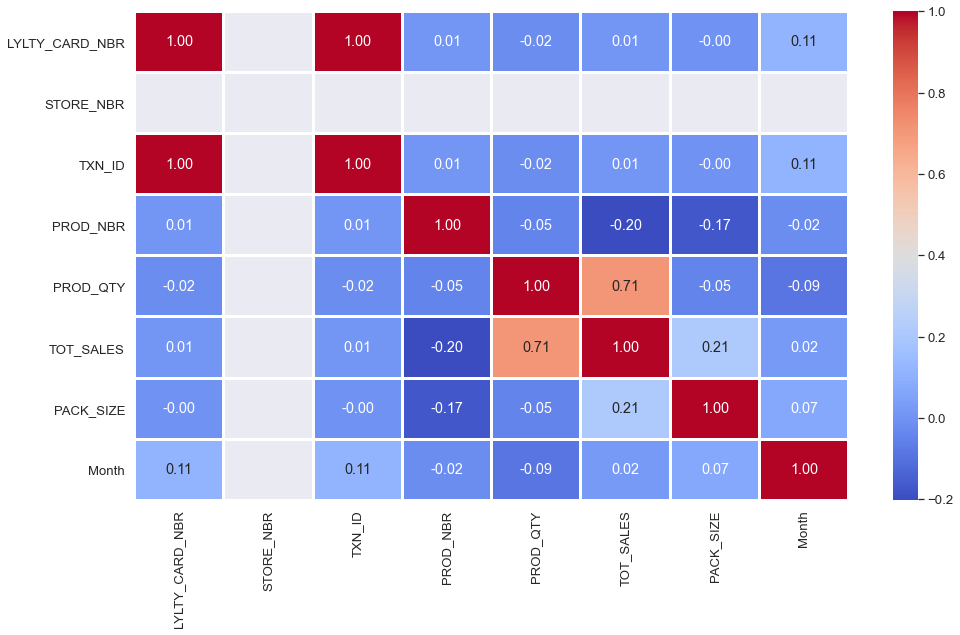

In [43]:
plt.figure(figsize=(16,9))
sns.heatmap(store77.corr(),cmap="coolwarm",annot=True,fmt='.2f',linewidths=2)
plt.show()

In [44]:
from scipy import stats

In [45]:
a = store86.groupby("Month")['TOT_SALES'].mean()

In [46]:
b = store88.groupby("Month")['TOT_SALES'].mean()

In [47]:
stats.ttest_ind(a,b)

Ttest_indResult(statistic=-18.63190924456552, pvalue=5.826951690590993e-15)